In [119]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
import torch

In [120]:
# import and look at data
data = pd.read_csv('forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [121]:
# check for null values and dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [122]:
# data statistics
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [123]:
# one-hot encoding target variable 
data.area = np.where((data.area < 1), 0, data.area)
data.area = np.where((data.area > 1), 1, data.area)

# checking if target variable is balanced
data.area.value_counts()

0.0    274
1.0    243
Name: area, dtype: int64

In [124]:
scaler = StandardScaler()
ml_features = scaler.fit_transform(pd.get_dummies(data.drop(data.columns[[0,1,12]], axis=1)))
ml_target = data.area

X_train = ml_features[:350]
y_train = ml_target[:350]
X_test = ml_features[350:]
y_test = ml_target[350:]

0.40718562874251496


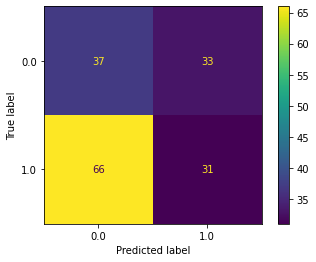

In [125]:
# Simple logistic regression classifer
clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [129]:
# Neural Network training
network = torch.nn.Sequential(torch.nn.Linear(27, 50),
                              torch.nn.ReLU(),
                             torch.nn.Linear(50, 2))

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=1e-2, momentum=0.9)

epochs = 100000

for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(X_train).float())
    targets = torch.autograd.Variable(torch.Tensor(y_train).long())
    optimizer.zero_grad()
    out = network(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    if epoch == 0 or (epoch +1) % 2500 == 0:
        print('Epoch %d Loss: %.4g' % (epoch + 1, loss.item()))

Epoch 1 Loss: 0.6985
Epoch 2500 Loss: 0.2443
Epoch 5000 Loss: 0.1464
Epoch 7500 Loss: 0.1134
Epoch 10000 Loss: 0.09343
Epoch 12500 Loss: 0.08246
Epoch 15000 Loss: 0.07495
Epoch 17500 Loss: 0.0694
Epoch 20000 Loss: 0.06567
Epoch 22500 Loss: 0.06268
Epoch 25000 Loss: 0.06032
Epoch 27500 Loss: 0.05823
Epoch 30000 Loss: 0.05665
Epoch 32500 Loss: 0.05534
Epoch 35000 Loss: 0.05422
Epoch 37500 Loss: 0.05327
Epoch 40000 Loss: 0.05243
Epoch 42500 Loss: 0.05172
Epoch 45000 Loss: 0.05107
Epoch 47500 Loss: 0.0505
Epoch 50000 Loss: 0.04999
Epoch 52500 Loss: 0.04954
Epoch 55000 Loss: 0.04912
Epoch 57500 Loss: 0.04875
Epoch 60000 Loss: 0.04841
Epoch 62500 Loss: 0.04809
Epoch 65000 Loss: 0.04781
Epoch 67500 Loss: 0.04755
Epoch 70000 Loss: 0.04731
Epoch 72500 Loss: 0.04709
Epoch 75000 Loss: 0.04689
Epoch 77500 Loss: 0.0467
Epoch 80000 Loss: 0.04653
Epoch 82500 Loss: 0.04636
Epoch 85000 Loss: 0.0462
Epoch 87500 Loss: 0.04605
Epoch 90000 Loss: 0.04586
Epoch 92500 Loss: 0.04573
Epoch 95000 Loss: 0.04561
E

Accuracy: 0.4431137724550898


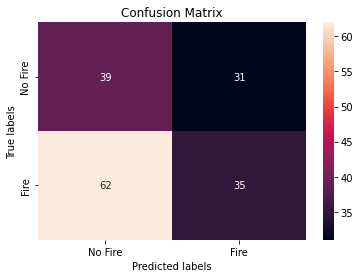

In [130]:
# Neural Network predictions
inputs = torch.autograd.Variable(torch.Tensor(X_test).float())

optimizer.zero_grad()
out = network(inputs)
_, predicted = torch.max(out.data, 1)

cm = confusion_matrix(y_test, predicted)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Fire', 'Fire']); ax.yaxis.set_ticklabels(['No Fire', 'Fire']);

print('Accuracy: ' + str(accuracy_score(y_test, predicted)))